#plan 

1.start with a distribution of distances and snr
2. Get snrs
3. The problem is how to transform this into 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import wisps
%matplotlib inline

/Users/caganze/research/splat/splat/core.py:44: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  import matplotlib; matplotlib.use('agg')
/Users/caganze/research/splat/splat/utilities.py:23: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  import matplotlib; matplotlib.use('agg')


In [2]:
#i can't generate fake spectra, so sad! what if I added more stuff 

#spectra=pd.read_pickle(wisps.OUTPUT_FILES+'/l_t_dwarfs.pkl')


In [3]:
#snrs=np.random.lognormal(1.0, 1.0,(len(spectra),1000))

In [4]:
sp=wisps.Source(name='goodss-04-G141_17402')

In [5]:
def fast_measure_indices(sp, regions, labels, **kwargs):
    #fast wway to measure indices without monte-carlo sampling or interpolation
    res=pd.Series()
    res.columns=labels

    #loop over ratios 
    for r, l in zip(regions, labels):
        flx1=np.nanmedian(sp.flux[np.where((sp.wave>r[0][0]) & (sp.wave<r[0][1]))[0]])
        flx2=np.nanmedian(sp.flux[np.where((sp.wave>r[1][0]) & (sp.wave<r[1][1]))[0]])
        res[l]= flx1/flx2
    return dict(res)

In [6]:
regions=np.array([[[1.15, 1.20], [1.246, 1.295]],
         [[1.38, 1.43],  [1.15, 1.20]], 
         [[1.56, 1.61],  [1.15, 1.20]], 
         [[1.62,1.67],   [1.15, 1.20]], 
        [[1.38, 1.43],  [1.246, 1.295]], 
         [[1.56, 1.61],  [1.246, 1.295]],
         [[1.62,1.67],   [1.246, 1.295]], 
         [[1.56, 1.61],  [1.38, 1.43]],
         [[1.62,1.67],   [1.38, 1.43]],
         [[1.62,1.67],   [1.56, 1.61]]])
labels=wisps.INDEX_NAMES

In [7]:
fast_measure_indices(sp, regions, labels)

{'H_2O-1/J-Cont': 0.2999917601247546,
 'H_2O-2/H_2O-1': 0.5625650843073171,
 'H-cont/H_2O-1': 1.6068808251359925,
 'CH_4/H_2O-1': 0.8330454709803128,
 'H_2O-2/J-Cont': 0.168764889826083,
 'H-cont/J-Cont': 0.48205100704326437,
 'CH_4/J-Cont': 0.24990677710333922,
 'H-cont/H_2O-2': 2.8563465276458366,
 'CH_4/H_2O-2': 1.4807983897650465,
 'CH_4/H-Cont': 0.5184239291111157}

In [8]:
sp.indices

{'H_2O-1/J-Cont': (0.5107368585303549, 0.0),
 'H_2O-2/H_2O-1': (0.3119802845219476, 0.0),
 'H-cont/H_2O-1': (0.6163606601841694, 0.0),
 'CH_4/H_2O-1': (0.7038772647230241, 0.0),
 'H_2O-2/J-Cont': (0.1593398304401458, 0.0),
 'H-cont/J-Cont': (0.31479810730415825, 0.0),
 'CH_4/J-Cont': (0.3594960629755763, 0.0),
 'H-cont/H_2O-2': (1.9756397784194242, 0.0),
 'CH_4/H_2O-2': (2.2561594422595856, 0.0),
 'CH_4/H-Cont': (1.1419892770455282, 0.0)}

(0.0, 1.0)

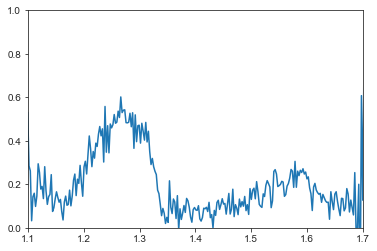

In [9]:
plt.plot(sp.wave, sp.flux)
plt.xlim([1.1, 1.7])
plt.ylim([0., 1.])

In [10]:
mask=np.where((sp.wave>1.1) & (sp.wave<1.7))[0]
mu= np.nanmedian(sp.noise[mask])

sigma=20.0*np.nanstd(sp.noise[mask])
addn=np.random.normal(mu,sigma,len(sp._flux))

(0.0, 1.0)

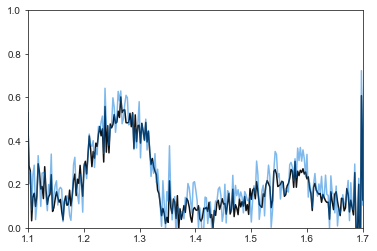

In [11]:
plt.plot(sp.wave, sp.flux, color='#111111')
plt.plot(sp.wave, (sp.flux-addn)+addn[0], alpha=.5, color='#0074D9')
plt.xlim([1.1, 1.7])
plt.ylim([0., 1.])

In [12]:
sp.normalize()

In [13]:
sp.add_noise(n=200)

(-0.0, 0.6)

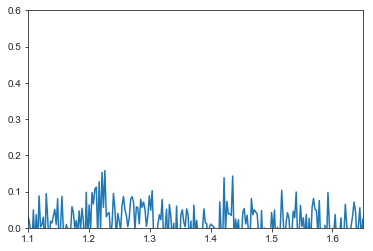

In [14]:
plt.plot(sp.wave, sp.flux)
plt.xlim([1.1, 1.65])
plt.ylim([-0.0, 0.6])

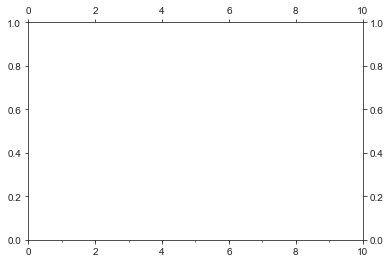

In [43]:
fig, ax=plt.subplots()
ax.set_xticks(np.linspace(0, 10, 11), minor=True)
ax.tick_params( bottom=True, top=True, left=True, right=True)
ax.tick_params(labeltop=True, labelright=True)

In [16]:
#